In [1]:
#test_scores.csv data 
import pandas as pd
df1 = pd.read_csv("C:/Users/GiJeong.DESKTOP-EV6M1H8.001/Downloads/test_scores.csv")

In [11]:
print(df1.head(5))

  school school_setting school_type classroom teaching_method  n_student  \
0  ANKYI          Urban  Non-public       6OL        Standard       20.0   
1  ANKYI          Urban  Non-public       6OL        Standard       20.0   
2  ANKYI          Urban  Non-public       6OL        Standard       20.0   
3  ANKYI          Urban  Non-public       6OL        Standard       20.0   
4  ANKYI          Urban  Non-public       6OL        Standard       20.0   

  student_id  gender             lunch  pretest  posttest  
0      2FHT3  Female  Does not qualify     62.0      72.0  
1      3JIVH  Female  Does not qualify     66.0      79.0  
2      3XOWE    Male  Does not qualify     64.0      76.0  
3      556O0  Female  Does not qualify     61.0      77.0  
4      74LOE    Male  Does not qualify     64.0      76.0  


In [12]:
len(df1) #데이터의 학생 수는 2133명이다. 

2133

## 1. 자료의 시각화

### 1) 범주형 자료 (school_setting, school_type, teaching method, gender, lunch)

* school_setting

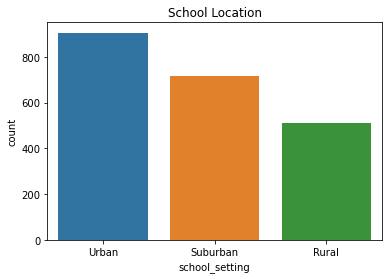

In [71]:
import seaborn as sns
sns.countplot(x= df1.school_setting).set_title('School Location');


# 도심이 가장 많고, 부도심, 시골 순이다.

* school_type

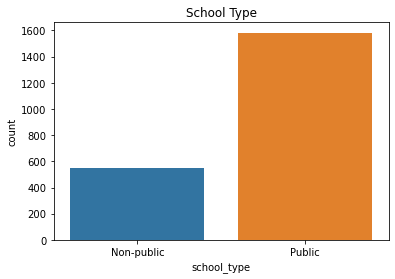

In [68]:
sns.countplot(x = df1.school_type).set_title('School Type');

#사립학교보다 공립학교를 다니는 학생이 약 2.6배 많다.

* teaching_method

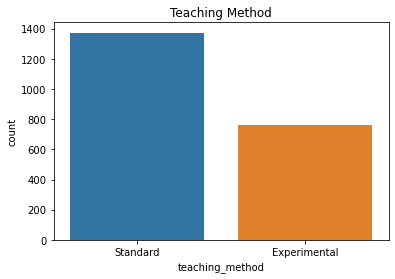

In [67]:
sns.countplot(x = df1.teaching_method).set_title('Teaching Method');

# 표준적인 교육을 받는 학생이 약 2배로 많다.

* gender

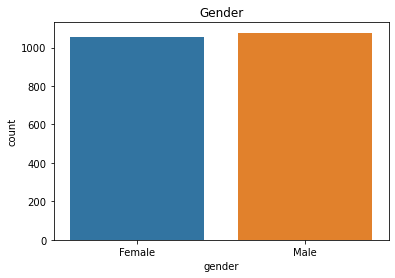

In [66]:
sns.countplot(x = df1.gender).set_title('Gender');

#남여의 성비는 거의 비슷하다.

* lunch

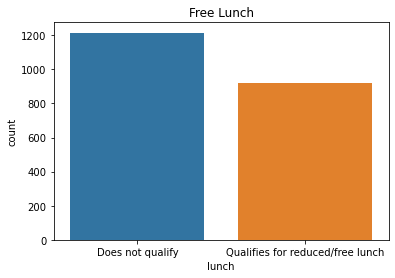

In [70]:
sns.countplot(x = df1.lunch).set_title('Free Lunch');

#무료급식을 받지 않는 학생이 약 200명 더 많다.

### 2) 연속형 자료 (n_student, pretest, posttest)

* n_student

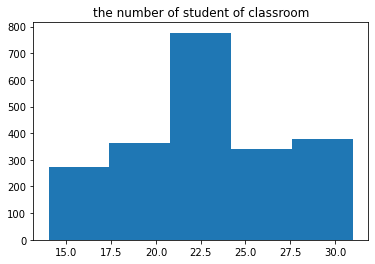

In [85]:
import matplotlib.pyplot as plt
plt.hist(df1["n_student"], bins=5)
plt.title('the number of student of classroom')
plt.show()

#학급의 학생 수가 20~25명 사이인 학급에 속한 학생이 가장 많은 것을 알 수 있으며, 학생 수가 가장 작은 학급은 15명, 가장 많은 학급은 30명이다.


* pretest

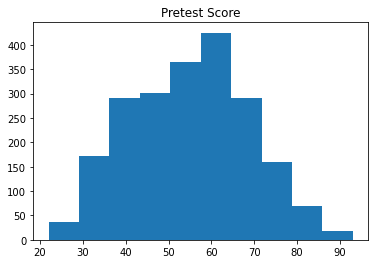

In [93]:
plt.hist(df1["pretest"], bins=10)
plt.title('Pretest Score')
plt.show()

#55~60점 사이의 학생이 가장 많은 것을 알 수 있다.

Text(0.5, 1.0, 'Pretest scores by gender')

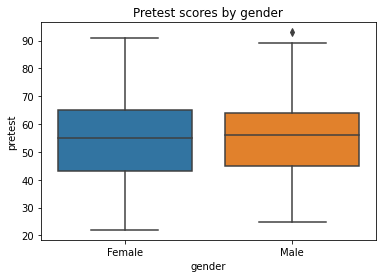

In [97]:
sns.boxplot(y = df1.pretest, x = df1.gender).set_title('Pretest scores by gender')

#여학생의 평균이 약간 더 낮긴 하지만, 성별 간 차이는 거의 없는 것으로 보인다. 

* posttest

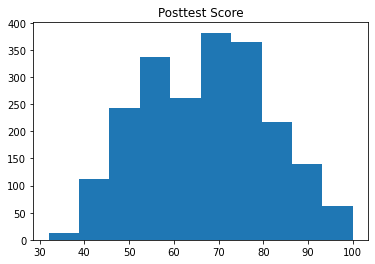

In [91]:
plt.hist(df1["posttest"], bins=10)
plt.title('Posttest Score')
plt.show()

# 70~75점 사이의 학생이 가장 많은 것을 알 수 있다.

Text(0.5, 1.0, 'Posttest scores by gender')

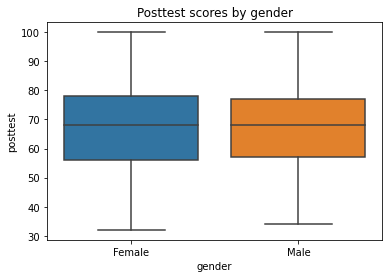

In [98]:
sns.boxplot(y = df1.posttest, x = df1.gender).set_title('Posttest scores by gender')

# posttest 점수의 성별 간 차이는 거의 없는 것으로 보인다. 

### 1. 자료 탐색 과정

In [15]:
# 전체 학생들의 pretest 점수와 posttest 점수 비교
import numpy as np

pretest = df1['pretest'].values
posttest = df1['posttest'].values

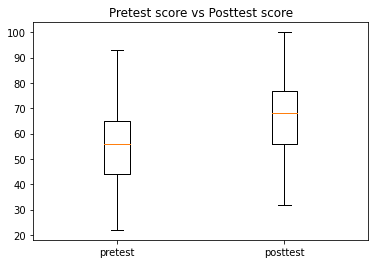

In [19]:
ig, ax = plt.subplots()
ax.boxplot([pretest, posttest], sym="b*")
plt.title('Pretest score vs Posttest score')

plt.xticks([1, 2],['pretest', 'posttest'])

plt.show()


In [9]:
avg_pre = np.mean(pretest)
avg_post = np.mean(posttest)
avg_pre, avg_post


(54.95593061415846, 67.10220346929208)

In [10]:
np.sum(pretest > avg_pre), np.sum(posttest > avg_post) #pretest 평균을 넘는 학생 수, posttest 평균을 넘는 학생 수

(1126, 1080)

In [48]:
np.sum(pretest >= posttest)

4

In [20]:
np.min(pretest), np.max(pretest) #pretest의 최소값,최대값

(22.0, 93.0)

In [22]:
np.min(posttest), np.max(posttest) #posttest의 최소값, 최대값

(32.0, 100.0)

pretest와 posttest 점수의 평균값을 비교한 결과, posttest 점수의 평균값이 더 높았다. posttest 평균을 넘는 학생보다는 pretest 평균을 넘는 학생이 더 많았고, posttest 점수보다 pretest 점수가 더 높은 학생은 4명밖에 되지 않았다.


또한, 최대 최소값을 비교한 결과, posttest 점수의 최소값, 최대값이 pretest 보다 더 높았다.

      



In [36]:
#pretest와 posttest 점수가 가장 높은 학생의 특징
np.sum(pretest == np.max(pretest)) 


1

In [38]:
df1[df1.pretest == np.max(pretest)]

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
908,IDGFP,Urban,Non-public,P2A,Experimental,17.0,QXTHU,Male,Does not qualify,93.0,100.0


In [39]:
np.sum(posttest == np.max(posttest)) 

8

In [40]:
df1[df1.posttest == np.max(posttest)]

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
902,IDGFP,Urban,Non-public,P2A,Experimental,17.0,BYVSP,Male,Does not qualify,86.0,100.0
903,IDGFP,Urban,Non-public,P2A,Experimental,17.0,D9SR6,Female,Does not qualify,83.0,100.0
905,IDGFP,Urban,Non-public,P2A,Experimental,17.0,K5955,Male,Does not qualify,85.0,100.0
907,IDGFP,Urban,Non-public,P2A,Experimental,17.0,P32P9,Male,Does not qualify,83.0,100.0
908,IDGFP,Urban,Non-public,P2A,Experimental,17.0,QXTHU,Male,Does not qualify,93.0,100.0
909,IDGFP,Urban,Non-public,P2A,Experimental,17.0,RG9R4,Male,Does not qualify,83.0,100.0
911,IDGFP,Urban,Non-public,P2A,Experimental,17.0,SH2DM,Male,Does not qualify,88.0,100.0
915,IDGFP,Urban,Non-public,P2A,Experimental,17.0,W4KYQ,Female,Does not qualify,81.0,100.0


pretest와 posttest가 가장 높은 학생들의 특징을 살펴본 결과, 모두 도시의 사립학교인 IDGFP를 재학중이고, 모두 학생 수가 17명인 P2A class이다. 이들은 실험적인 교육을 받으며, 무료 급식을 받지 않고 있다.
또한, pretest와 posttest 점수가 다 평균 이상인 것을 확인할 수 있다.

In [42]:
#pretest와 posttest 점수가 가장 낮은 학생의 특징
np.sum(pretest == np.min(pretest)) 


1

In [43]:
df1[df1.pretest == np.min(pretest)]

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
1873,VVTVA,Urban,Public,A93,Experimental,30.0,A84RV,Female,Qualifies for reduced/free lunch,22.0,47.0


In [44]:
np.sum(pretest == np.min(posttest))

23

In [46]:
df1[df1.posttest == np.min(posttest)]

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
740,GOOBU,Urban,Public,HKF,Standard,28.0,78IT6,Female,Qualifies for reduced/free lunch,32.0,32.0


pretest와 posttest 점수가 가장 낮은 학생들의 특징을 살펴본 결과 도시의 공립학교에 재학중이며, 한 학급의 학생 수가 28명,30명으로 많은 편이다. 이들은 무료 급식을 받고 있으며, pretest와 posttest 점수가 평균 이하인 것을 확인할 수 있다. 

# T-test

In [105]:
stats.shapiro(pretest) #pretest의 normality test H0:normally distributed vs H1: not H0

ShapiroResult(statistic=0.9897909164428711, pvalue=3.809542264976429e-11)

In [104]:
stats.shapiro(posttest)

ShapiroResult(statistic=0.9877511858940125, pvalue=1.5582422505100446e-12)

In [ ]:
pretest와 posttest 점수는 정규분포를 따르지 않기 때문에 t-test를 진행할 수 없다.(밑에꺼 살릴건지 말껀지 다시 보기)

* pretest 점수와 posttest 점수의 평균 차이

H0 : pretest 점수의 평균과 posttest 점수의 평균은 차이가 없다.         
H1 : pretest 점수의 평균과 posttest 점수의 평균은 차이가 있다.


In [100]:
from scipy import stats
score_pttest = stats.ttest_rel(pretest, posttest)
score_pttest

Ttest_relResult(statistic=-129.3281121713851, pvalue=0.0)

In [101]:
print("t-value = %.3f,p-value = %.3f" % score_pttest)

t-value = -129.328,p-value = 0.000


p-value가 매우 작으므로 H0 기각한다. 즉, pretest 점수의 평균과 posttest 점수의 평균에는 차이가 있다.